In [81]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
%matplotlib inline 

import seaborn as sns

In [26]:
import os
import pandas as pd
import numpy as np

from utils.datatools import *

In [27]:
PHASEPATH = "/Users/sujinlee/desktop/git_repositories/nims_pd/dataset_LHEE_RHEE_Z_PHASE/"
SAVEPATH = "/Users/sujinlee/desktop/git_repositories/nims_pd/dataset_LHEE_RHEE_Z_PHASE_STD/"
CONTROL_PATH = os.path.join(SAVEPATH, "Controls")
PD_PATH = os.path.join(SAVEPATH, "PD")

if os.path.exists(SAVEPATH) == False: os.mkdir(SAVEPATH)
if os.path.exists(CONTROL_PATH) == False: os.mkdir(CONTROL_PATH)
if os.path.exists(PD_PATH) == False: os.mkdir(PD_PATH)

In [28]:
patients = getPatientsTable()
# patients.head()

In [29]:
CONTROL = patients[patients["Category"] == "Controls"]
PD = patients[patients["Category"] == "PD"]

In [30]:
print("Controls count:", len(CONTROL))
print("PD count:", len(PD))

Controls count: 22
PD count: 83


----

---

In [99]:
TARGET_CATE = "Controls"
# TARGET_PATIENT_INITIAL = CONTROL.iloc[0]["Patient"]
TARGET_PATIENT_INITIAL = 'BHY'

print("Target Category:", TARGET_CATE)
print("Target Patient Initial:", TARGET_PATIENT_INITIAL)

Target Category: Controls
Target Patient Initial: BHY


In [94]:
FWdata = [
    pd.read_csv(os.path.join(CONTROL_PATH, f"LHEE0_{TARGET_PATIENT_INITIAL}_FW72.csv")),
    pd.read_csv(os.path.join(CONTROL_PATH, f"LHEE0_{TARGET_PATIENT_INITIAL}_FW80.csv")),
    pd.read_csv(os.path.join(CONTROL_PATH, f"LHEE0_{TARGET_PATIENT_INITIAL}_FW90.csv"))
]

In [95]:
data = FWdata[0]

In [96]:
data.head()

,Frame,Sub Frame,LFHD_X,LFHD_Y,LFHD_Z,RFHD_X,RFHD_Y,RFHD_Z,LBHD_X,LBHD_Y,...,RTOE_Z,CentreOfMass_X,CentreOfMass_Y,CentreOfMass_Z,CentreOfMassFloor_X,CentreOfMassFloor_Y,CentreOfMassFloor_Z,LHEE_Z_DIFF,RHEE_Z_DIFF,PHASE
0,481,0,-22.811214,-128.744323,1416.160597,95.531914,-120.545227,1414.968702,-15.302364,-286.287414,...,3.084589,52.469889,-164.287536,812.619398,52.469889,-164.287536,-31.68767,0.111141,5.809219,1.0
1,482,0,-24.298412,-117.444519,1415.919752,94.077566,-109.446838,1414.654615,-17.103565,-275.020935,...,2.909689,51.492797,-153.645935,812.204115,51.492797,-153.645935,-31.68767,0.589147,6.373123,1.0
2,483,0,-25.835239,-106.085876,1415.942457,92.571522,-98.277404,1414.565626,-18.978786,-263.693908,...,2.656400,50.498311,-142.821106,811.961988,50.498311,-142.821106,-31.68767,0.856518,7.007752,1.0
3,484,0,-27.418484,-94.679504,1416.245191,91.033936,-87.049255,1414.741163,-20.878856,-252.318176,...,2.306192,49.513462,-131.816467,811.910658,49.513462,-131.816467,-31.68767,0.951069,7.653465,1.0
4,485,0,-29.064976,-83.232116,1416.806593,89.469773,-75.769348,1415.190382,-22.760692,-240.908752,...,1.835348,48.545359,-120.648864,812.045484,48.545359,-120.648864,-31.68767,0.932541,8.260697,1.0


In [79]:
# row 0
data.iloc[0]["LHEE_X"], data.iloc[0]["LHEE_Y"], data.iloc[0]["LHEE_Z"]

(0.0, 0.0, 0.0)

In [80]:
# row 1
data.iloc[1]["LHEE_X"], data.iloc[1]["LHEE_Y"], data.iloc[1]["LHEE_Z"]

(0.1022040000000004, 1.7598880000000463, 0.5891470000000005)

<AxesSubplot:>

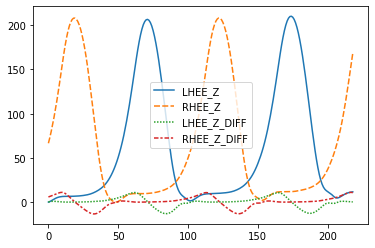

In [45]:
sns.lineplot(data=data[["LHEE_Z", "RHEE_Z", "LHEE_Z_DIFF", "RHEE_Z_DIFF"]])

<AxesSubplot:>

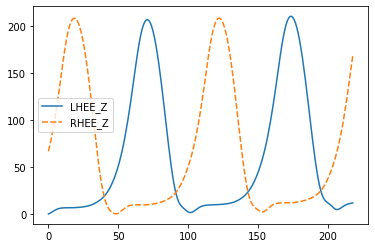

In [47]:
sns.lineplot(data=data[["LHEE_Z", "RHEE_Z"]])

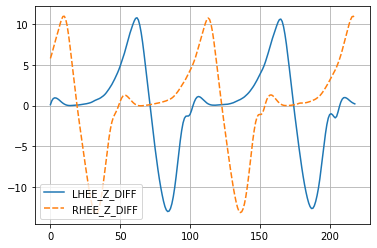

In [46]:
sns.lineplot(data=data[["LHEE_Z_DIFF", "RHEE_Z_DIFF"]])
plt.grid()

In [49]:
np.where(data["PHASE"] == 1)

(array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
         13,  14,  15,  16,  17,  18,  19,  49,  50,  51,  52,  53,  54,
         55,  56,  57,  58,  59,  60,  61,  62,  67,  68,  69,  70,  71,
        103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115,
        116, 117, 118, 119, 120, 121, 122, 154, 155, 156, 157, 158, 159,
        160, 161, 162, 163, 164, 165, 166, 167, 168, 171, 172, 173, 174,
        208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218]),)

In [51]:
start = [np.where(data["PHASE"] == 1)[0][0]] + [ x for idx, x in enumerate(np.where(data["PHASE"] == 1)[0][1:]) if x -np.where(data["PHASE"] == 1)[0][idx] > 5 ]
start

[0, 49, 103, 154, 208]

In [53]:
for f in start:
    print()
    print(data.iloc[f][["LHEE_Z", "RHEE_Z"]])


LHEE_Z     0.000000
RHEE_Z    66.546186
Name: 0, dtype: float64

LHEE_Z    45.888082
RHEE_Z     0.164240
Name: 49, dtype: float64

LHEE_Z     1.886308
RHEE_Z    65.094846
Name: 103, dtype: float64

LHEE_Z    62.502332
RHEE_Z     2.305952
Name: 154, dtype: float64

LHEE_Z     5.080862
RHEE_Z    74.394201
Name: 208, dtype: float64


## 3) Z left-right

### 1- LHEE Standardized values

<AxesSubplot:>

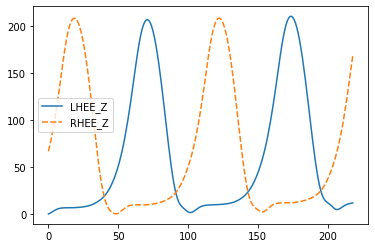

In [84]:
sns.lineplot(data=data[["LHEE_Z", "RHEE_Z"]])

<AxesSubplot:>

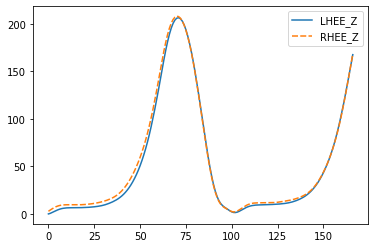

In [85]:
sns.lineplot(data=pd.DataFrame({
            "LHEE_Z" : data.iloc[0:-(start[1]+3)]["LHEE_Z"].values,
            "RHEE_Z" : data.iloc[start[1]+3:]["RHEE_Z"].values})
            )

### 2- Vector

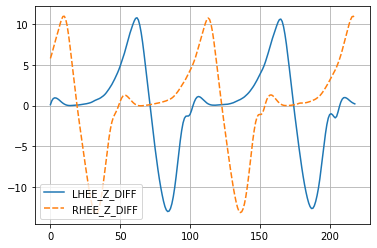

In [86]:
sns.lineplot(data=data[["LHEE_Z_DIFF", "RHEE_Z_DIFF"]])
plt.grid()

<AxesSubplot:>

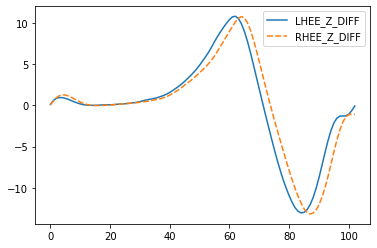

In [98]:
sns.lineplot(data=pd.DataFrame({
            "LHEE_Z_DIFF" : data.iloc[0:start[2]]["LHEE_Z_DIFF"].values,
            "RHEE_Z_DIFF" : data.iloc[start[1]:start[1]+start[2]]["RHEE_Z_DIFF"].values})
            )

## 4) x-y 

In [89]:
# 2d x-y 그리기 
def plot2Dxy(mark, data):
    plt.plot(data[mark+"_X"], data[mark+"_Y"])
    plt.title(mark)
    plt.xlabel("X")
    plt.ylabel("Y")

    return plt

In [90]:
# 2D x-y trial 겹쳐 그리기
def plot2Dxytrials(mark, dataList, patient_initial):
    if len(dataList) == 2:
        plt.plot(FWdata[0][mark+"_X"], FWdata[0][mark+"_Y"], 'r', 
                 FWdata[1][mark+"_X"], FWdata[1][mark+"_Y"], 'g')
    if len(dataList) == 3:
        plt.plot(FWdata[0][mark+"_X"], FWdata[0][mark+"_Y"], 'r', 
                 FWdata[1][mark+"_X"], FWdata[1][mark+"_Y"], 'g',
                 FWdata[2][mark+"_X"], FWdata[2][mark+"_Y"], 'b')
    plt.title(patient_initial + " " + mark)
    plt.xlabel("X")
    plt.ylabel("Y")    
    plt.show()

<module 'matplotlib.pyplot' from '/Users/sujinlee/.virtualenvs/ml/lib/python3.9/site-packages/matplotlib/pyplot.py'>

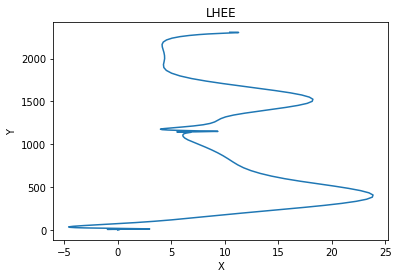

In [91]:
plot2Dxy("LHEE", data)

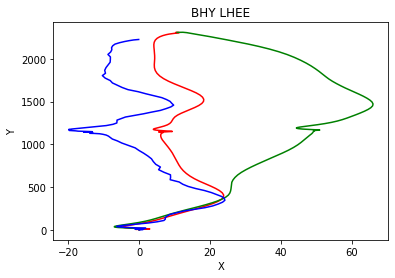

In [97]:
plot2Dxytrials("LHEE", FWdata, TARGET_PATIENT_INITIAL)